In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

Load data all source data

In [2]:
array = [-0.07148371428571432, -0.07482199999999972, 0.07188114285714287, -0.021844857142856444, -0.01382571428571433, 0.06850657142857175, 0.12562028571428563, 0.12634599999999985, 0.12246342857142878, -0.0068225714285712336, -0.06800028571428607, -0.047244857142856755, -0.048297142857142816, -0.04691828571428536, -0.017599428571428266, -0.015567428571428454, -0.01447885714285757, -0.014769142857142814, -0.011503428571428831, -0.0068225714285712336, -0.003847142857142938, 0.12957542857142856, 0.10025657142857103, 0.12210057142857123, 0.12435028571428619, 0.12344314285714297, 0.04103828571428636, -0.02267942857142824, -0.028340000000000032, -0.030734857142856953, -0.023223714285714347, -0.025509714285714136, -0.03327485714285672, -0.01886942857142815, -0.027142571428571127, -0.014696571428570948, -0.021227999999999803, -0.013934571428571019, 0.0, 0.04506599999999983, 0.05192400000000008, 0.024782285714285646, -0.015603714285714165, -0.06288399999999994, -0.071774, -0.06908885714285695, 0.050218571428571224, 0.005659714285714212, -0.05911028571428556, -0.06477085714285691, -0.06255742857142899, -0.05511885714285736, 0.010848571428571763, 0.017089714285714486, 0.013025714285714418, 0.028302000000000493, 0.02939057142857182, 0.03334571428571431, 0.021843142857143505, 0.025326571428572198, 0.029608285714286087, 0.022605142857143434, 0.024129142857143293, 0.02822942857142907, 0.02434685714285756, 0.024963714285714644, 0.03091457142857168, 0.02790285714285723, 0.030696857142857414, 0.028628571428571448, 0.02518142857142891, 0.03026142857142844, 0.027431142857142987, 0.03519628571428601, 0.02558057142857173, 0.024528285714286113, 0.03058800000000028, 0.18081085714285727, 0.17710971428571431, 0.17750885714285713, 0.17834342857142893, -0.10312485714285735, 0.06426114285714313, 0.04111085714285778, 0.009941428571428546, -0.02634428571428593, -0.02757799999999966, -0.03058971428571411, -0.012011428571428784, -0.01186628571428594, -0.01690999999999976, -0.015095714285713768, -0.016256857142856518, -0.02347771428571388, -0.017417999999999267, -0.020647428571428428, -0.027904571428571057, -0.02409457142857141, -0.03868142857142853, -0.023151142857142926, -0.03026314285714271, -0.02445742857142852, -0.04201971428571438, -0.03908057142857091, -0.02946485714285707, -0.03632285714285688, -0.038246, -0.038499999999999535, -0.04234628571428578, -0.04561200000000021, -0.053594857142857055, -0.021554571428570757, 0.0037002857142858225, 0.028846285714285713, 0.02456457142857138, 0.02677800000000019, 0.02278657142857199, 0.018142000000000547, 0.013969142857143346, 0.015348000000000361, 0.014150571428571457, 0.008998000000000062, 0.009215714285714327, 0.02608857142857124, 0.02779400000000054, 0.025254000000000776, 0.02968085714285751, 0.029463142857143243, 0.0, 0.04829542857142899, 0.05141600000000013, 0.11473457142857146, 0.11038028571428571, 0.06364428571428604, -0.11865514285714251, -0.07329799999999986, -0.022643142857142973, 0.010304285714286099, 0.008598857142857685, 0.005623428571428946, 0.012771714285714442, 0.014440857142857144, 0.016364000000000267, 0.012989428571428707, 0.01687200000000022, 0.013207142857142529, 0.009796285714285702, 0.01981114285714325, 0.019557142857143273, 0.024274285714286137, 0.023113142857142943, 0.020536857142857468, 0.017634000000000594, 0.024891142857143222, 0.020464285714286046, 0.020936000000000288, 0.023657428571428607, 0.026778000000000635, 0.02499999999999991, 0.02597971428571455, 0.026233714285714527, 0.023911428571428583, 0.012916857142857285, 0.020936000000000288, 0.018758857142857188, 0.026995714285714456, 0.03174914285714303, -0.03820971428571385, -0.03527057142857126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
array = np.array(array)
output = pd.read_json('output.json')

mm_to_in = 0.039370257
target_thickness =2.5149999999999997

nan = np.nan
# raw_data = [[2.4475439999999997, 2.4396699999999996, 2.589022, 2.496566, 2.502916, 2.584958, 2.6438859999999997, 2.64287, 2.641092, 2.507996, 2.4472899999999997, 2.47015, 2.4678639999999996, 2.4698959999999994, 2.4998679999999998, 2.502408, 2.503424, 2.502662, 2.502916, 2.50825, 2.512314, 2.6461719999999995, 2.6164539999999996, 2.6393139999999997, 2.6415999999999995, 2.641092, 2.556002, 2.4912319999999997, 2.4856439999999997, 2.485136, 2.4892, 2.4902159999999998, 2.4805639999999998, 2.4952959999999997, 2.4899620000000002, 2.497836, 2.4952959999999997, 2.49936, nan, 2.55905, 2.568702, 2.538222, 2.4960579999999997, 2.449068, 2.4442419999999996, 2.4434799999999997, 2.5666700000000002, 2.523744, 2.4566879999999998, 2.4533859999999996, 2.4551639999999995, 2.46126, 2.5273, 2.532634, 2.530348, 2.5443179999999996, 2.5463500000000003, 2.548636, 2.539492, 2.540508, 2.54508, 2.539238, 2.54127, 2.5443179999999996, 2.54, 2.541524, 2.5463500000000003, 2.5443179999999996, 2.546096, 2.54508, 2.54381, 2.545588, 2.544826, 2.549144, 2.542794, 2.543556, 2.545842, 2.695448, 2.695194, 2.694686, 2.6941779999999995, 2.412746, 2.58064, 2.555748, 2.526284, 2.489454, 2.487676, 2.487422, 2.502916, 2.50317, 2.5003759999999997, 2.499106, 2.498344, 2.4914859999999996, 2.496312, 2.4950419999999998, 2.4869139999999996, 2.491994, 2.47904, 2.49174, 2.484882, 2.489454, 2.4734519999999995, 2.477516, 2.483866, 2.481834, 2.4780239999999996, 2.4762459999999997, 2.4716739999999997, 2.468372, 2.461768, 2.494026, 2.51841, 2.545588, 2.5407619999999995, 2.5417780000000003, 2.538222, 2.533904, 2.5283160000000002, 2.530856, 2.531618, 2.5239979999999997, 2.5250139999999996, 2.542032, 2.545588, 2.542794, 2.545588, 2.545842, nan, 2.5623519999999997, 2.564892, 2.6271219999999995, 2.6243279999999993, 2.57937, 2.4005539999999996, 2.4442419999999996, 2.4958039999999997, 2.5283160000000002, 2.5252679999999996, 2.5242519999999997, 2.5298399999999996, 2.5295859999999997, 2.5344119999999997, 2.530094, 2.5333959999999998, 2.5288239999999997, 2.5250139999999996, 2.53746, 2.5351739999999996, 2.539238, 2.5387299999999997, 2.536698, 2.5341579999999997, 2.541016, 2.538476, 2.5351739999999996, 2.539492, 2.542794, 2.54127, 2.54254, 2.5433019999999997, 2.5387299999999997, 2.529332, 2.537714, 2.5389839999999997, 2.542286, 2.5473660000000002, 2.4764999999999997, 2.4813259999999997, nan, nan, nan, nan, nan, nan, nan], [2.43459, 2.420874, 2.6776679999999997, 2.484882, 2.4968199999999996, 2.579878, 2.633726, 2.6362659999999996, 2.633218, 2.554224, 2.4371299999999994, 2.4452579999999995, 2.4511, 2.4518619999999998, 2.4879299999999995, 2.48539, 2.489454, 2.486406, 2.489708, 2.496566, 2.5003759999999997, 2.6530299999999998, 2.6492199999999997, 2.6441399999999997, 2.649982, 2.6441399999999997, 2.631948, 2.49428, 2.484374, 2.490978, 2.493264, 2.4958039999999997, 2.483612, 2.5046939999999998, 2.493264, 2.501138, 2.5059639999999996, 2.502662, nan, 2.56921, 2.583434, 2.577592, 2.529332, 2.4678639999999996, 2.464054, 2.461006, 2.4823419999999996, 2.64541, 2.445512, 2.4417019999999994, 2.4452579999999995, 2.4523699999999997, 2.5107899999999996, 2.53111, 2.531872, 2.5453339999999995, 2.548128, 2.5478739999999998, 2.53619, 2.539238, 2.536444, 2.53619, 2.539238, 2.540254, 2.5387299999999997, 2.539238, 2.5433019999999997, 2.543556, 2.5433019999999997, 2.542032, 2.542286, 2.5407619999999995, 2.5463500000000003, 2.550922, 2.5387299999999997, 2.5430479999999998, 2.5433019999999997, 2.708656, 2.7155139999999998, 2.7071319999999996, 2.7160219999999997, 2.4234139999999997, 2.612644, 2.559304, 2.5577799999999997, 2.49428, 2.492756, 2.493264, 2.5097739999999997, 2.5151079999999997, 2.502662, 2.50571, 2.508504, 2.4970739999999996, 2.499614, 2.49936, 2.4871679999999996, 2.496566, 2.480056, 2.497836, 2.49174, 2.500884, 2.479548, 2.4866599999999996, 2.4892, 2.491994, 2.48539, 2.4892, 2.479548, 2.480818, 2.468372, 2.503424, 2.5069799999999995, 2.551684, 2.5488899999999997, 2.55143, 2.5476199999999998, 2.542794, 2.535936, 2.536952, 2.536698, 2.527046, 2.5283160000000002, 2.544064, 2.549652, 2.552192, 2.5499059999999996, 2.5527, nan, 2.564892, 2.579624, 2.6471879999999994, 2.6355039999999996, 2.6187399999999994, 2.4043639999999993, 2.416302, 2.5049479999999997, 2.5387299999999997, 2.537714, 2.531872, 2.534666, 2.540508, 2.542286, 2.5389839999999997, 2.544064, 2.533904, 2.53111, 2.54508, 2.544064, 2.5488899999999997, 2.5499059999999996, 2.5478739999999998, 2.54508, 2.551684, 2.551176, 2.545842, 2.5499059999999996, 2.5488899999999997, 2.5534619999999997, 2.5478739999999998, 2.554224, 2.554732, 2.535936, 2.540508, 2.54381, 2.545842, 2.559812, 2.4688799999999995, 2.479802, nan, nan, nan, nan, nan, nan, nan], [2.460498, 2.458212, 2.5003759999999997, 2.507996, 2.5092659999999998, 2.589784, 2.6540459999999997, 2.6494739999999997, 2.6489659999999997, 2.4615139999999998, 2.4577039999999997, 2.4950419999999998, 2.484374, 2.487676, 2.511806, 2.519172, 2.517394, 2.5189179999999998, 2.5161239999999996, 2.520188, 2.5239979999999997, 2.6393139999999997, 2.583942, 2.6342339999999997, 2.633218, 2.6380439999999994, 2.480056, 2.488184, 2.4869139999999996, 2.47904, 2.484882, 2.484628, 2.477516, 2.4856439999999997, 2.4866599999999996, 2.494534, 2.484374, 2.4960579999999997, nan, 2.5488899999999997, 2.55397, 2.498598, 2.4625299999999997, 2.4305259999999995, 2.4244299999999996, 2.4259539999999995, 2.650998, 2.402078, 2.468118, 2.46507, 2.46507, 2.47015, 2.54381, 2.533904, 2.529078, 2.543556, 2.544572, 2.549144, 2.5430479999999998, 2.5417780000000003, 2.553716, 2.542032, 2.5430479999999998, 2.548128, 2.541016, 2.544064, 2.549652, 2.54508, 2.549144, 2.5478739999999998, 2.54508, 2.55016, 2.5433019999999997, 2.5473660000000002, 2.546604, 2.544064, 2.548128, 2.6824939999999997, 2.6751279999999995, 2.6822399999999997, 2.6723339999999998, 2.402078, 2.548636, 2.5519380000000003, 2.494534, 2.484628, 2.48285, 2.4815799999999997, 2.4960579999999997, 2.4912319999999997, 2.49809, 2.492248, 2.488184, 2.4861519999999997, 2.492756, 2.4904699999999997, 2.486406, 2.487422, 2.4780239999999996, 2.4858979999999997, 2.478278, 2.4780239999999996, 2.4671019999999997, 2.468372, 2.478532, 2.4714199999999997, 2.470658, 2.463546, 2.463546, 2.455672, 2.455418, 2.484628, 2.5295859999999997, 2.5397459999999996, 2.53238, 2.532126, 2.529078, 2.5250139999999996, 2.520442, 2.524506, 2.526284, 2.52095, 2.521458, 2.54, 2.54127, 2.53365, 2.54127, 2.5389839999999997, nan, 2.560066, 2.5499059999999996, 2.607056, 2.6131519999999995, 2.540254, 2.3967439999999995, 2.471928, 2.4869139999999996, 2.5181560000000003, 2.512822, 2.516378, 2.52476, 2.51841, 2.526538, 2.521458, 2.522728, 2.5239979999999997, 2.5189179999999998, 2.530094, 2.526538, 2.529332, 2.527554, 2.525776, 2.522982, 2.530348, 2.525776, 2.52476, 2.529078, 2.536952, 2.5288239999999997, 2.5372060000000003, 2.532126, 2.522728, 2.522728, 2.534666, 2.533904, 2.5387299999999997, 2.5351739999999996, 2.48412, 2.483104, nan, nan, nan, nan, nan, nan, nan], [2.4279859999999998, 2.427224, 2.6682699999999997, 2.477262, 2.491994, 2.5709880000000003, 2.6268679999999995, 2.6243279999999993, 2.6255979999999997, 2.564892, 2.4333199999999997, 2.4338279999999997, 2.4518619999999998, 2.4488139999999996, 2.47904, 2.482088, 2.48412, 2.47904, 2.4861519999999997, 2.4861519999999997, 2.494534, 2.652776, 2.6586179999999997, 2.6377899999999994, 2.6451559999999996, 2.6433779999999993, 2.6222959999999995, 2.484374, 2.47523, 2.4780239999999996, 2.488692, 2.4879299999999995, 2.467356, 2.4970739999999996, 2.4815799999999997, 2.494534, 2.4892, 2.497582, nan, 2.561336, 2.5735279999999996, 2.572004, 2.5194259999999997, 2.4511, 2.4477979999999997, 2.451354, 2.4566879999999998, 2.63271, 2.4297639999999996, 2.431034, 2.4282399999999997, 2.439924, 2.49809, 2.516632, 2.51841, 2.530348, 2.533142, 2.531872, 2.5171399999999995, 2.52476, 2.51841, 2.511298, 2.521458, 2.5189179999999998, 2.520188, 2.5217119999999995, 2.5273, 2.522982, 2.52603, 2.5252679999999996, 2.527808, 2.531872, 2.5273, 2.547112, 2.52476, 2.5161239999999996, 2.5273, 2.7111959999999997, 2.71399, 2.7066239999999997, 2.714752, 2.4086819999999998, 2.610612, 2.558542, 2.55524, 2.483866, 2.485136, 2.49555, 2.5097739999999997, 2.51206, 2.497836, 2.5044399999999998, 2.5107899999999996, 2.493264, 2.496312, 2.497582, 2.48539, 2.49428, 2.47396, 2.501138, 2.490978, 2.5092659999999998, 2.4764999999999997, 2.47904, 2.4925019999999996, 2.4912319999999997, 2.485136, 2.491994, 2.4810719999999997, 2.47396, 2.469642, 2.503678, 2.51206, 2.55016, 2.554224, 2.5577799999999997, 2.55524, 2.548636, 2.537714, 2.538222, 2.533904, 2.532634, 2.5273, 2.546858, 2.55016, 2.548636, 2.554986, 2.55905, nan, 2.57302, 2.59334, 2.657602, 2.6426159999999994, 2.6220419999999995, 2.3987759999999994, 2.4137619999999997, 2.5006299999999997, 2.537968, 2.538476, 2.53365, 2.537714, 2.5433019999999997, 2.5417780000000003, 2.537714, 2.544572, 2.532888, 2.535428, 2.5478739999999998, 2.549398, 2.554478, 2.5478739999999998, 2.5476199999999998, 2.549398, 2.5532079999999997, 2.5453339999999995, 2.55524, 2.5587959999999996, 2.551176, 2.56032, 2.5488899999999997, 2.56159, 2.555748, 2.536698, 2.546604, 2.549144, 2.552954, 2.5626059999999997, 2.4721819999999997, 2.484882, nan, nan, nan, nan, nan, nan, nan], [2.427732, 2.4279859999999998, 2.6751279999999995, 2.48285, 2.496312, 2.5814019999999998, 2.6278839999999994, 2.6423619999999994, 2.6248359999999997, 2.551684, 2.4376379999999997, 2.4505919999999994, 2.4439879999999996, 2.4531319999999996, 2.485136, 2.479294, 2.4858979999999997, 2.484374, 2.4904699999999997, 2.5013919999999996, 2.5049479999999997, 2.6400759999999996, 2.6413459999999995, 2.6405839999999996, 2.6413459999999995, 2.6342339999999997, 2.6370279999999995, 2.506472, 2.4869139999999996, 2.49428, 2.5006299999999997, 2.4960579999999997, 2.491994, 2.506472, 2.4892, 2.507742, 2.518664, 2.507742, nan, 2.5709880000000003, 2.576068, 2.587498, 2.541524, 2.4805639999999998, 2.4688799999999995, 2.479548, 2.4902159999999998, 2.6471879999999994, 2.450338, 2.443734, 2.453894, 2.459228, 2.5062179999999996, 2.54, 2.534666, 2.548636, 2.5397459999999996, 2.554478, 2.5397459999999996, 2.5433019999999997, 2.53619, 2.5499059999999996, 2.545842, 2.552192, 2.550414, 2.550668, 2.549144, 2.551684, 2.554478, 2.54508, 2.542032, 2.5453339999999995, 2.5532079999999997, 2.550414, 2.54127, 2.55016, 2.555494, 2.708402, 2.7114499999999997, 2.7043379999999995, 2.714244, 2.4333199999999997, 2.6075639999999995, 2.563114, 2.558288, 2.49936, 2.498598, 2.4825959999999996, 2.5135840000000003, 2.517648, 2.4952959999999997, 2.504186, 2.5095199999999998, 2.500122, 2.5052019999999997, 2.49809, 2.488184, 2.4950419999999998, 2.478278, 2.4970739999999996, 2.492248, 2.503932, 2.4759919999999997, 2.486406, 2.4787859999999995, 2.481834, 2.479548, 2.4912319999999997, 2.465832, 2.480056, 2.467356, 2.506726, 2.513076, 2.554986, 2.548128, 2.5499059999999996, 2.549144, 2.542032, 2.536698, 2.540508, 2.530348, 2.521966, 2.52603, 2.5372060000000003, 2.544826, 2.542032, 2.548636, 2.548636, nan, 2.5654000000000003, 2.5763220000000002, 2.6423619999999994, 2.6301699999999997, 2.6156919999999997, 2.403094, 2.4145239999999997, 2.499106, 2.5298399999999996, 2.532126, 2.522728, 2.530856, 2.5417780000000003, 2.5298399999999996, 2.537714, 2.5389839999999997, 2.532126, 2.531872, 2.5397459999999996, 2.5407619999999995, 2.546858, 2.548128, 2.5499059999999996, 2.540254, 2.544064, 2.5476199999999998, 2.544064, 2.546858, 2.5532079999999997, 2.5463500000000003, 2.544064, 2.552192, 2.5532079999999997, 2.53746, 2.536444, 2.5344119999999997, 2.5372060000000003, 2.555748, 2.47015, 2.474214, nan, nan, nan, nan, nan, nan, nan], [2.465832, 2.4638, 2.512568, 2.508504, 2.5135840000000003, 2.595626, 2.6596339999999996, 2.65557, 2.6441399999999997, 2.4668479999999997, 2.4607519999999994, 2.5019, 2.493772, 2.493264, 2.512822, 2.5146, 2.520442, 2.526284, 2.530602, 2.532634, 2.533142, 2.652776, 2.595626, 2.6377899999999994, 2.6322019999999995, 2.6388059999999998, 2.487422, 2.4970739999999996, 2.503678, 2.484628, 2.4935179999999995, 2.48031, 2.4871679999999996, 2.494534, 2.4950419999999998, 2.506472, 2.4858979999999997, 2.50317, nan, 2.55397, 2.5633679999999996, 2.49936, 2.4716739999999997, 2.449068, 2.43459, 2.4325579999999993, 2.6530299999999998, 2.4010619999999996, 2.473706, 2.45999, 2.46507, 2.4764999999999997, 2.545842, 2.536952, 2.5242519999999997, 2.5488899999999997, 2.548128, 2.5519380000000003, 2.540508, 2.5534619999999997, 2.560574, 2.550668, 2.547112, 2.544064, 2.549398, 2.5476199999999998, 2.55524, 2.551684, 2.554478, 2.554478, 2.550414, 2.550922, 2.5577799999999997, 2.563876, 2.549144, 2.547112, 2.545842, 2.6807159999999994, 2.6677619999999997, 2.6730959999999997, 2.666746, 2.4041099999999997, 2.5463500000000003, 2.542794, 2.4810719999999997, 2.4770079999999997, 2.474976, 2.4698959999999994, 2.497836, 2.497582, 2.488184, 2.479548, 2.483612, 2.47523, 2.4907239999999997, 2.478278, 2.4777699999999996, 2.4767539999999997, 2.4724359999999996, 2.474214, 2.47269, 2.468118, 2.464054, 2.450084, 2.473706, 2.468372, 2.4622759999999997, 2.4577039999999997, 2.461768, 2.46126, 2.4450039999999995, 2.4866599999999996, 2.527808, 2.529078, 2.5283160000000002, 2.5242519999999997, 2.5250139999999996, 2.522728, 2.512822, 2.521204, 2.5161239999999996, 2.52476, 2.5151079999999997, 2.530094, 2.532634, 2.525522, 2.53746, 2.532634, nan, 2.556256, 2.54254, 2.607818, 2.608326, 2.535682, 2.389124, 2.4643079999999995, 2.47396, 2.5095199999999998, 2.502408, 2.510028, 2.5151079999999997, 2.507488, 2.5181560000000003, 2.513838, 2.518664, 2.5242519999999997, 2.5135840000000003, 2.5273, 2.515616, 2.520442, 2.5181560000000003, 2.5135840000000003, 2.510282, 2.532634, 2.519172, 2.5151079999999997, 2.5217119999999995, 2.525776, 2.529078, 2.529078, 2.52603, 2.5140919999999998, 2.515362, 2.528062, 2.5194259999999997, 2.530856, 2.5372060000000003, 2.471928, 2.47523, nan, nan, nan, nan, nan, nan, nan], [2.4404319999999995, 2.4434799999999997, 2.485136, 2.494026, 2.497328, 2.58191, 2.638298, 2.638552, 2.6443939999999997, 2.450084, 2.4551639999999995, 2.477516, 2.47396, 2.471928, 2.5052019999999997, 2.513076, 2.502916, 2.503932, 2.508504, 2.51206, 2.508758, 2.6278839999999994, 2.56159, 2.6258519999999996, 2.631948, 2.6294079999999997, 2.477516, 2.484628, 2.483866, 2.4777699999999996, 2.492248, 2.4914859999999996, 2.483866, 2.4892, 2.479294, 2.4998679999999998, 2.4770079999999997, 2.500884, nan, 2.557018, 2.549398, 2.5052019999999997, 2.47523, 2.436622, 2.4185879999999997, 2.427478, 2.656586, 2.392426, 2.4671019999999997, 2.4566879999999998, 2.4544019999999995, 2.4597359999999995, 2.5488899999999997, 2.5333959999999998, 2.527554, 2.542032, 2.550668, 2.554478, 2.5417780000000003, 2.539238, 2.5618440000000002, 2.533904, 2.535936, 2.554732, 2.535682, 2.53492, 2.550414, 2.541016, 2.5463500000000003, 2.545588, 2.5298399999999996, 2.552192, 2.5242519999999997, 2.54254, 2.5407619999999995, 2.532634, 2.5532079999999997, 2.683764, 2.66573, 2.6794459999999996, 2.6751279999999995, 2.3987759999999994, 2.548382, 2.561336, 2.5013919999999996, 2.491994, 2.4899620000000002, 2.4805639999999998, 2.490978, 2.485136, 2.504186, 2.5140919999999998, 2.492248, 2.497328, 2.502154, 2.5016459999999996, 2.497836, 2.49428, 2.4724359999999996, 2.4950419999999998, 2.4823419999999996, 2.48412, 2.474214, 2.4833579999999995, 2.502154, 2.464054, 2.4762459999999997, 2.465578, 2.485136, 2.465578, 2.4622759999999997, 2.474976, 2.522982, 2.535682, 2.5242519999999997, 2.5351739999999996, 2.520188, 2.516886, 2.530856, 2.520188, 2.529078, 2.516632, 2.526284, 2.5473660000000002, 2.535428, 2.536952, 2.53492, 2.5333959999999998, nan, 2.561082, 2.558288, 2.618994, 2.623566, 2.5387299999999997, 2.381758, 2.4668479999999997, 2.485136, 2.5146, 2.516378, 2.505456, 2.521458, 2.5250139999999996, 2.526538, 2.5161239999999996, 2.5206959999999996, 2.521458, 2.517648, 2.5161239999999996, 2.530348, 2.535682, 2.536444, 2.5273, 2.526284, 2.526284, 2.5206959999999996, 2.531364, 2.52476, 2.53365, 2.5206959999999996, 2.5372060000000003, 2.519172, 2.533142, 2.517902, 2.527554, 2.516632, 2.546096, 2.529332, 2.493772, 2.479548, nan, nan, nan, nan, nan, nan, nan]]
raw_data = np.array([[2.4475439999999997, 2.4396699999999996, 2.589022, 2.496566, 2.502916, 2.584958, 2.6438859999999997, 2.64287, 2.641092, 2.507996, 2.4472899999999997, 2.47015, 2.4678639999999996, 2.4698959999999994, 2.4998679999999998, 2.502408, 2.503424, 2.502662, 2.502916, 2.50825, 2.512314, 2.6461719999999995, 2.6164539999999996, 2.6393139999999997, 2.6415999999999995, 2.641092, 2.556002, 2.4912319999999997, 2.4856439999999997, 2.485136, 2.4892, 2.4902159999999998, 2.4805639999999998, 2.4952959999999997, 2.4899620000000002, 2.497836, 2.4952959999999997, 2.49936, nan, 2.55905, 2.568702, 2.538222, 2.4960579999999997, 2.449068, 2.4442419999999996, 2.4434799999999997, 2.5666700000000002, 2.523744, 2.4566879999999998, 2.4533859999999996, 2.4551639999999995, 2.46126, 2.5273, 2.532634, 2.530348, 2.5443179999999996, 2.5463500000000003, 2.548636, 2.539492, 2.540508, 2.54508, 2.539238, 2.54127, 2.5443179999999996, 2.54, 2.541524, 2.5463500000000003, 2.5443179999999996, 2.546096, 2.54508, 2.54381, 2.545588, 2.544826, 2.549144, 2.542794, 2.543556, 2.545842, 2.695448, 2.695194, 2.694686, 2.6941779999999995, 2.412746, 2.58064, 2.555748, 2.526284, 2.489454, 2.487676, 2.487422, 2.502916, 2.50317, 2.5003759999999997, 2.499106, 2.498344, 2.4914859999999996, 2.496312, 2.4950419999999998, 2.4869139999999996, 2.491994, 2.47904, 2.49174, 2.484882, 2.489454, 2.4734519999999995, 2.477516, 2.483866, 2.481834, 2.4780239999999996, 2.4762459999999997, 2.4716739999999997, 2.468372, 2.461768, 2.494026, 2.51841, 2.545588, 2.5407619999999995, 2.5417780000000003, 2.538222, 2.533904, 2.5283160000000002, 2.530856, 2.531618, 2.5239979999999997, 2.5250139999999996, 2.542032, 2.545588, 2.542794, 2.545588, 2.545842, nan, 2.5623519999999997, 2.564892, 2.6271219999999995, 2.6243279999999993, 2.57937, 2.4005539999999996, 2.4442419999999996, 2.4958039999999997, 2.5283160000000002, 2.5252679999999996, 2.5242519999999997, 2.5298399999999996, 2.5295859999999997, 2.5344119999999997, 2.530094, 2.5333959999999998, 2.5288239999999997, 2.5250139999999996, 2.53746, 2.5351739999999996, 2.539238, 2.5387299999999997, 2.536698, 2.5341579999999997, 2.541016, 2.538476, 2.5351739999999996, 2.539492, 2.542794, 2.54127, 2.54254, 2.5433019999999997, 2.5387299999999997, 2.529332, 2.537714, 2.5389839999999997, 2.542286, 2.5473660000000002, 2.4764999999999997, 2.4813259999999997, nan, nan, nan, nan, nan, nan, nan], [2.43459, 2.420874, 2.6776679999999997, 2.484882, 2.4968199999999996, 2.579878, 2.633726, 2.6362659999999996, 2.633218, 2.554224, 2.4371299999999994, 2.4452579999999995, 2.4511, 2.4518619999999998, 2.4879299999999995, 2.48539, 2.489454, 2.486406, 2.489708, 2.496566, 2.5003759999999997, 2.6530299999999998, 2.6492199999999997, 2.6441399999999997, 2.649982, 2.6441399999999997, 2.631948, 2.49428, 2.484374, 2.490978, 2.493264, 2.4958039999999997, 2.483612, 2.5046939999999998, 2.493264, 2.501138, 2.5059639999999996, 2.502662, nan, 2.56921, 2.583434, 2.577592, 2.529332, 2.4678639999999996, 2.464054, 2.461006, 2.4823419999999996, 2.64541, 2.445512, 2.4417019999999994, 2.4452579999999995, 2.4523699999999997, 2.5107899999999996, 2.53111, 2.531872, 2.5453339999999995, 2.548128, 2.5478739999999998, 2.53619, 2.539238, 2.536444, 2.53619, 2.539238, 2.540254, 2.5387299999999997, 2.539238, 2.5433019999999997, 2.543556, 2.5433019999999997, 2.542032, 2.542286, 2.5407619999999995, 2.5463500000000003, 2.550922, 2.5387299999999997, 2.5430479999999998, 2.5433019999999997, 2.708656, 2.7155139999999998, 2.7071319999999996, 2.7160219999999997, 2.4234139999999997, 2.612644, 2.559304, 2.5577799999999997, 2.49428, 2.492756, 2.493264, 2.5097739999999997, 2.5151079999999997, 2.502662, 2.50571, 2.508504, 2.4970739999999996, 2.499614, 2.49936, 2.4871679999999996, 2.496566, 2.480056, 2.497836, 2.49174, 2.500884, 2.479548, 2.4866599999999996, 2.4892, 2.491994, 2.48539, 2.4892, 2.479548, 2.480818, 2.468372, 2.503424, 2.5069799999999995, 2.551684, 2.5488899999999997, 2.55143, 2.5476199999999998, 2.542794, 2.535936, 2.536952, 2.536698, 2.527046, 2.5283160000000002, 2.544064, 2.549652, 2.552192, 2.5499059999999996, 2.5527, nan, 2.564892, 2.579624, 2.6471879999999994, 2.6355039999999996, 2.6187399999999994, 2.4043639999999993, 2.416302, 2.5049479999999997, 2.5387299999999997, 2.537714, 2.531872, 2.534666, 2.540508, 2.542286, 2.5389839999999997, 2.544064, 2.533904, 2.53111, 2.54508, 2.544064, 2.5488899999999997, 2.5499059999999996, 2.5478739999999998, 2.54508, 2.551684, 2.551176, 2.545842, 2.5499059999999996, 2.5488899999999997, 2.5534619999999997, 2.5478739999999998, 2.554224, 2.554732, 2.535936, 2.540508, 2.54381, 2.545842, 2.559812, 2.4688799999999995, 2.479802, nan, nan, nan, nan, nan, nan, nan], [2.460498, 2.458212, 2.5003759999999997, 2.507996, 2.5092659999999998, 2.589784, 2.6540459999999997, 2.6494739999999997, 2.6489659999999997, 2.4615139999999998, 2.4577039999999997, 2.4950419999999998, 2.484374, 2.487676, 2.511806, 2.519172, 2.517394, 2.5189179999999998, 2.5161239999999996, 2.520188, 2.5239979999999997, 2.6393139999999997, 2.583942, 2.6342339999999997, 2.633218, 2.6380439999999994, 2.480056, 2.488184, 2.4869139999999996, 2.47904, 2.484882, 2.484628, 2.477516, 2.4856439999999997, 2.4866599999999996, 2.494534, 2.484374, 2.4960579999999997, nan, 2.5488899999999997, 2.55397, 2.498598, 2.4625299999999997, 2.4305259999999995, 2.4244299999999996, 2.4259539999999995, 2.650998, 2.402078, 2.468118, 2.46507, 2.46507, 2.47015, 2.54381, 2.533904, 2.529078, 2.543556, 2.544572, 2.549144, 2.5430479999999998, 2.5417780000000003, 2.553716, 2.542032, 2.5430479999999998, 2.548128, 2.541016, 2.544064, 2.549652, 2.54508, 2.549144, 2.5478739999999998, 2.54508, 2.55016, 2.5433019999999997, 2.5473660000000002, 2.546604, 2.544064, 2.548128, 2.6824939999999997, 2.6751279999999995, 2.6822399999999997, 2.6723339999999998, 2.402078, 2.548636, 2.5519380000000003, 2.494534, 2.484628, 2.48285, 2.4815799999999997, 2.4960579999999997, 2.4912319999999997, 2.49809, 2.492248, 2.488184, 2.4861519999999997, 2.492756, 2.4904699999999997, 2.486406, 2.487422, 2.4780239999999996, 2.4858979999999997, 2.478278, 2.4780239999999996, 2.4671019999999997, 2.468372, 2.478532, 2.4714199999999997, 2.470658, 2.463546, 2.463546, 2.455672, 2.455418, 2.484628, 2.5295859999999997, 2.5397459999999996, 2.53238, 2.532126, 2.529078, 2.5250139999999996, 2.520442, 2.524506, 2.526284, 2.52095, 2.521458, 2.54, 2.54127, 2.53365, 2.54127, 2.5389839999999997, nan, 2.560066, 2.5499059999999996, 2.607056, 2.6131519999999995, 2.540254, 2.3967439999999995, 2.471928, 2.4869139999999996, 2.5181560000000003, 2.512822, 2.516378, 2.52476, 2.51841, 2.526538, 2.521458, 2.522728, 2.5239979999999997, 2.5189179999999998, 2.530094, 2.526538, 2.529332, 2.527554, 2.525776, 2.522982, 2.530348, 2.525776, 2.52476, 2.529078, 2.536952, 2.5288239999999997, 2.5372060000000003, 2.532126, 2.522728, 2.522728, 2.534666, 2.533904, 2.5387299999999997, 2.5351739999999996, 2.48412, 2.483104, nan, nan, nan, nan, nan, nan, nan], [2.4279859999999998, 2.427224, 2.6682699999999997, 2.477262, 2.491994, 2.5709880000000003, 2.6268679999999995, 2.6243279999999993, 2.6255979999999997, 2.564892, 2.4333199999999997, 2.4338279999999997, 2.4518619999999998, 2.4488139999999996, 2.47904, 2.482088, 2.48412, 2.47904, 2.4861519999999997, 2.4861519999999997, 2.494534, 2.652776, 2.6586179999999997, 2.6377899999999994, 2.6451559999999996, 2.6433779999999993, 2.6222959999999995, 2.484374, 2.47523, 2.4780239999999996, 2.488692, 2.4879299999999995, 2.467356, 2.4970739999999996, 2.4815799999999997, 2.494534, 2.4892, 2.497582, nan, 2.561336, 2.5735279999999996, 2.572004, 2.5194259999999997, 2.4511, 2.4477979999999997, 2.451354, 2.4566879999999998, 2.63271, 2.4297639999999996, 2.431034, 2.4282399999999997, 2.439924, 2.49809, 2.516632, 2.51841, 2.530348, 2.533142, 2.531872, 2.5171399999999995, 2.52476, 2.51841, 2.511298, 2.521458, 2.5189179999999998, 2.520188, 2.5217119999999995, 2.5273, 2.522982, 2.52603, 2.5252679999999996, 2.527808, 2.531872, 2.5273, 2.547112, 2.52476, 2.5161239999999996, 2.5273, 2.7111959999999997, 2.71399, 2.7066239999999997, 2.714752, 2.4086819999999998, 2.610612, 2.558542, 2.55524, 2.483866, 2.485136, 2.49555, 2.5097739999999997, 2.51206, 2.497836, 2.5044399999999998, 2.5107899999999996, 2.493264, 2.496312, 2.497582, 2.48539, 2.49428, 2.47396, 2.501138, 2.490978, 2.5092659999999998, 2.4764999999999997, 2.47904, 2.4925019999999996, 2.4912319999999997, 2.485136, 2.491994, 2.4810719999999997, 2.47396, 2.469642, 2.503678, 2.51206, 2.55016, 2.554224, 2.5577799999999997, 2.55524, 2.548636, 2.537714, 2.538222, 2.533904, 2.532634, 2.5273, 2.546858, 2.55016, 2.548636, 2.554986, 2.55905, nan, 2.57302, 2.59334, 2.657602, 2.6426159999999994, 2.6220419999999995, 2.3987759999999994, 2.4137619999999997, 2.5006299999999997, 2.537968, 2.538476, 2.53365, 2.537714, 2.5433019999999997, 2.5417780000000003, 2.537714, 2.544572, 2.532888, 2.535428, 2.5478739999999998, 2.549398, 2.554478, 2.5478739999999998, 2.5476199999999998, 2.549398, 2.5532079999999997, 2.5453339999999995, 2.55524, 2.5587959999999996, 2.551176, 2.56032, 2.5488899999999997, 2.56159, 2.555748, 2.536698, 2.546604, 2.549144, 2.552954, 2.5626059999999997, 2.4721819999999997, 2.484882, nan, nan, nan, nan, nan, nan, nan], [2.427732, 2.4279859999999998, 2.6751279999999995, 2.48285, 2.496312, 2.5814019999999998, 2.6278839999999994, 2.6423619999999994, 2.6248359999999997, 2.551684, 2.4376379999999997, 2.4505919999999994, 2.4439879999999996, 2.4531319999999996, 2.485136, 2.479294, 2.4858979999999997, 2.484374, 2.4904699999999997, 2.5013919999999996, 2.5049479999999997, 2.6400759999999996, 2.6413459999999995, 2.6405839999999996, 2.6413459999999995, 2.6342339999999997, 2.6370279999999995, 2.506472, 2.4869139999999996, 2.49428, 2.5006299999999997, 2.4960579999999997, 2.491994, 2.506472, 2.4892, 2.507742, 2.518664, 2.507742, nan, 2.5709880000000003, 2.576068, 2.587498, 2.541524, 2.4805639999999998, 2.4688799999999995, 2.479548, 2.4902159999999998, 2.6471879999999994, 2.450338, 2.443734, 2.453894, 2.459228, 2.5062179999999996, 2.54, 2.534666, 2.548636, 2.5397459999999996, 2.554478, 2.5397459999999996, 2.5433019999999997, 2.53619, 2.5499059999999996, 2.545842, 2.552192, 2.550414, 2.550668, 2.549144, 2.551684, 2.554478, 2.54508, 2.542032, 2.5453339999999995, 2.5532079999999997, 2.550414, 2.54127, 2.55016, 2.555494, 2.708402, 2.7114499999999997, 2.7043379999999995, 2.714244, 2.4333199999999997, 2.6075639999999995, 2.563114, 2.558288, 2.49936, 2.498598, 2.4825959999999996, 2.5135840000000003, 2.517648, 2.4952959999999997, 2.504186, 2.5095199999999998, 2.500122, 2.5052019999999997, 2.49809, 2.488184, 2.4950419999999998, 2.478278, 2.4970739999999996, 2.492248, 2.503932, 2.4759919999999997, 2.486406, 2.4787859999999995, 2.481834, 2.479548, 2.4912319999999997, 2.465832, 2.480056, 2.467356, 2.506726, 2.513076, 2.554986, 2.548128, 2.5499059999999996, 2.549144, 2.542032, 2.536698, 2.540508, 2.530348, 2.521966, 2.52603, 2.5372060000000003, 2.544826, 2.542032, 2.548636, 2.548636, nan, 2.5654000000000003, 2.5763220000000002, 2.6423619999999994, 2.6301699999999997, 2.6156919999999997, 2.403094, 2.4145239999999997, 2.499106, 2.5298399999999996, 2.532126, 2.522728, 2.530856, 2.5417780000000003, 2.5298399999999996, 2.537714, 2.5389839999999997, 2.532126, 2.531872, 2.5397459999999996, 2.5407619999999995, 2.546858, 2.548128, 2.5499059999999996, 2.540254, 2.544064, 2.5476199999999998, 2.544064, 2.546858, 2.5532079999999997, 2.5463500000000003, 2.544064, 2.552192, 2.5532079999999997, 2.53746, 2.536444, 2.5344119999999997, 2.5372060000000003, 2.555748, 2.47015, 2.474214, nan, nan, nan, nan, nan, nan, nan], [2.465832, 2.4638, 2.512568, 2.508504, 2.5135840000000003, 2.595626, 2.6596339999999996, 2.65557, 2.6441399999999997, 2.4668479999999997, 2.4607519999999994, 2.5019, 2.493772, 2.493264, 2.512822, 2.5146, 2.520442, 2.526284, 2.530602, 2.532634, 2.533142, 2.652776, 2.595626, 2.6377899999999994, 2.6322019999999995, 2.6388059999999998, 2.487422, 2.4970739999999996, 2.503678, 2.484628, 2.4935179999999995, 2.48031, 2.4871679999999996, 2.494534, 2.4950419999999998, 2.506472, 2.4858979999999997, 2.50317, nan, 2.55397, 2.5633679999999996, 2.49936, 2.4716739999999997, 2.449068, 2.43459, 2.4325579999999993, 2.6530299999999998, 2.4010619999999996, 2.473706, 2.45999, 2.46507, 2.4764999999999997, 2.545842, 2.536952, 2.5242519999999997, 2.5488899999999997, 2.548128, 2.5519380000000003, 2.540508, 2.5534619999999997, 2.560574, 2.550668, 2.547112, 2.544064, 2.549398, 2.5476199999999998, 2.55524, 2.551684, 2.554478, 2.554478, 2.550414, 2.550922, 2.5577799999999997, 2.563876, 2.549144, 2.547112, 2.545842, 2.6807159999999994, 2.6677619999999997, 2.6730959999999997, 2.666746, 2.4041099999999997, 2.5463500000000003, 2.542794, 2.4810719999999997, 2.4770079999999997, 2.474976, 2.4698959999999994, 2.497836, 2.497582, 2.488184, 2.479548, 2.483612, 2.47523, 2.4907239999999997, 2.478278, 2.4777699999999996, 2.4767539999999997, 2.4724359999999996, 2.474214, 2.47269, 2.468118, 2.464054, 2.450084, 2.473706, 2.468372, 2.4622759999999997, 2.4577039999999997, 2.461768, 2.46126, 2.4450039999999995, 2.4866599999999996, 2.527808, 2.529078, 2.5283160000000002, 2.5242519999999997, 2.5250139999999996, 2.522728, 2.512822, 2.521204, 2.5161239999999996, 2.52476, 2.5151079999999997, 2.530094, 2.532634, 2.525522, 2.53746, 2.532634, nan, 2.556256, 2.54254, 2.607818, 2.608326, 2.535682, 2.389124, 2.4643079999999995, 2.47396, 2.5095199999999998, 2.502408, 2.510028, 2.5151079999999997, 2.507488, 2.5181560000000003, 2.513838, 2.518664, 2.5242519999999997, 2.5135840000000003, 2.5273, 2.515616, 2.520442, 2.5181560000000003, 2.5135840000000003, 2.510282, 2.532634, 2.519172, 2.5151079999999997, 2.5217119999999995, 2.525776, 2.529078, 2.529078, 2.52603, 2.5140919999999998, 2.515362, 2.528062, 2.5194259999999997, 2.530856, 2.5372060000000003, 2.471928, 2.47523, nan, nan, nan, nan, nan, nan, nan], [2.4404319999999995, 2.4434799999999997, 2.485136, 2.494026, 2.497328, 2.58191, 2.638298, 2.638552, 2.6443939999999997, 2.450084, 2.4551639999999995, 2.477516, 2.47396, 2.471928, 2.5052019999999997, 2.513076, 2.502916, 2.503932, 2.508504, 2.51206, 2.508758, 2.6278839999999994, 2.56159, 2.6258519999999996, 2.631948, 2.6294079999999997, 2.477516, 2.484628, 2.483866, 2.4777699999999996, 2.492248, 2.4914859999999996, 2.483866, 2.4892, 2.479294, 2.4998679999999998, 2.4770079999999997, 2.500884, nan, 2.557018, 2.549398, 2.5052019999999997, 2.47523, 2.436622, 2.4185879999999997, 2.427478, 2.656586, 2.392426, 2.4671019999999997, 2.4566879999999998, 2.4544019999999995, 2.4597359999999995, 2.5488899999999997, 2.5333959999999998, 2.527554, 2.542032, 2.550668, 2.554478, 2.5417780000000003, 2.539238, 2.5618440000000002, 2.533904, 2.535936, 2.554732, 2.535682, 2.53492, 2.550414, 2.541016, 2.5463500000000003, 2.545588, 2.5298399999999996, 2.552192, 2.5242519999999997, 2.54254, 2.5407619999999995, 2.532634, 2.5532079999999997, 2.683764, 2.66573, 2.6794459999999996, 2.6751279999999995, 2.3987759999999994, 2.548382, 2.561336, 2.5013919999999996, 2.491994, 2.4899620000000002, 2.4805639999999998, 2.490978, 2.485136, 2.504186, 2.5140919999999998, 2.492248, 2.497328, 2.502154, 2.5016459999999996, 2.497836, 2.49428, 2.4724359999999996, 2.4950419999999998, 2.4823419999999996, 2.48412, 2.474214, 2.4833579999999995, 2.502154, 2.464054, 2.4762459999999997, 2.465578, 2.485136, 2.465578, 2.4622759999999997, 2.474976, 2.522982, 2.535682, 2.5242519999999997, 2.5351739999999996, 2.520188, 2.516886, 2.530856, 2.520188, 2.529078, 2.516632, 2.526284, 2.5473660000000002, 2.535428, 2.536952, 2.53492, 2.5333959999999998, nan, 2.561082, 2.558288, 2.618994, 2.623566, 2.5387299999999997, 2.381758, 2.4668479999999997, 2.485136, 2.5146, 2.516378, 2.505456, 2.521458, 2.5250139999999996, 2.526538, 2.5161239999999996, 2.5206959999999996, 2.521458, 2.517648, 2.5161239999999996, 2.530348, 2.535682, 2.536444, 2.5273, 2.526284, 2.526284, 2.5206959999999996, 2.531364, 2.52476, 2.53365, 2.5206959999999996, 2.5372060000000003, 2.519172, 2.533142, 2.517902, 2.527554, 2.516632, 2.546096, 2.529332, 2.493772, 2.479548, nan, nan, nan, nan, nan, nan, nan]])

In [3]:
len(output['Histogram'].Bins), len(output['Histogram'].Data), len(output['Histogram'].Fit)

(201, 201, 201)

/home/jupyter/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


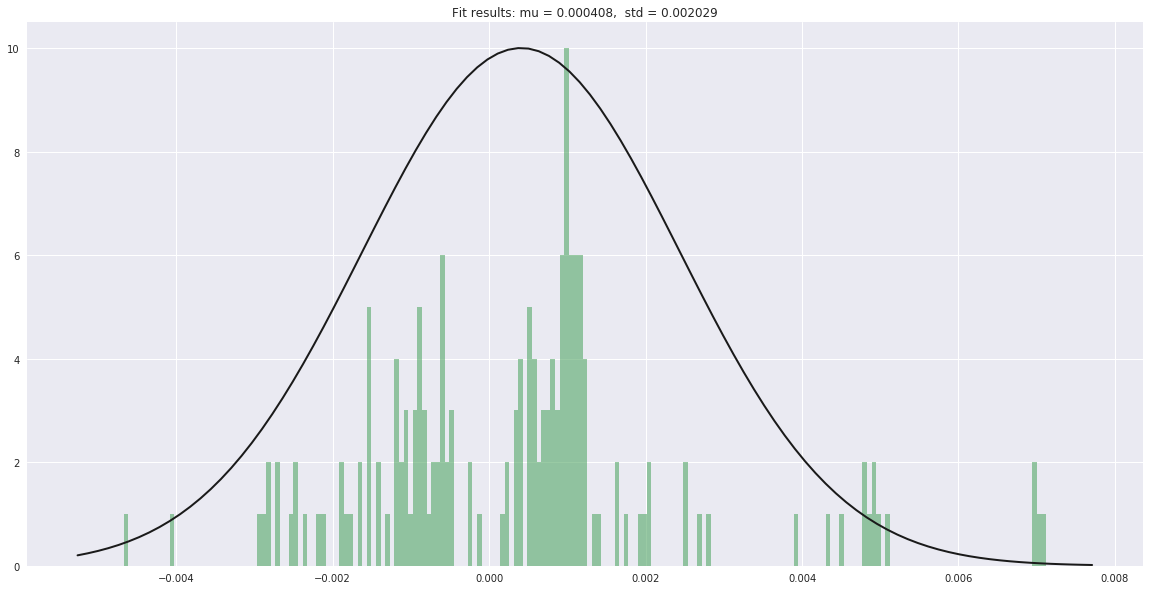

In [4]:


# calculate mean of data per 7 arrays
mean_array = np.nanmean(raw_data, axis=0)
# drop nan values
array_filted = np.array([value for value in mean_array if not math.isnan(value)])
# sub target thickness
array_filted -= target_thickness
# from mm to in
array_filted *= mm_to_in
# Fit a normal distribution to the data:
mu, std = norm.fit(array_filted)

plt.figure(figsize=(20, 10))
# Plot the histogram.
weights = np.ones_like(array_filted)/float(len(array_filted))
n , bins, gr = plt.hist(array_filted, bins=201, normed=False, alpha=0.6, color='g')
# plt.hist(array_filted, weights=weights)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
p /= p.max()
p *= n.max()
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.6f,  std = %.6f" % (mu, std)
plt.title(title)

plt.show()

# Create function 

In [5]:
def data_to_json(raw_data, target_thickness=2.5149999999999997, n_bins=200, boder_value=0.508):
    # consts
    mm_to_in = 0.039370257
    
    # calculate mean of data
    mean_array = np.nanmean(raw_data, axis=0)
    # drop nan values
    array_filted = np.array([value for value in mean_array if not math.isnan(value)])
    # sub target thickness
    array_filted -= target_thickness
    # from mm to in
    array_filted *= mm_to_in
    # calculete mean value and std for fitting
    mu, std = norm.fit(array_filted)
    
    # calculate Data and Bins
    Data, Bins = np.histogram(array_filted, n_bins, [-boder_value*mm_to_in, boder_value*mm_to_in], normed=True)
    Data = np.append(Data, 0)
    # calculate Fit
    xmin, xmax = Bins.min(), Bins.max()
    x = np.linspace(xmin, xmax, n_bins)
    Fit = norm.pdf(x, mu, std)
    
    # create DataFrame
    data = {'Histogram'     : [Bins, Data, Fit],
        'Index Title'  : ["Bins", "Data", "Fit"]}
    df = pd.DataFrame(data)
    df.index = df["Index Title"]
    del df["Index Title"]
    del df.index.name
    
    return df

source output 

In [6]:
output

,Histogram
Bins,"[-0.0199, -0.019701, -0.019502, -0.019303, -0...."
Data,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
Fit,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


current output

In [7]:
data_to_json(raw_data)

/home/jupyter/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


,Histogram
Bins,"[-0.020000090556, -0.0198000896504, -0.0196000..."
Data,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Fit,"[2.15861444898e-20, 5.81580879568e-20, 1.55161..."
